In [265]:
!pip install pandas

In [266]:
pip install plotly geopandas

Note: you may need to restart the kernel to use updated packages.


In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats.mstats import trimmed_var
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_is_fitted
import plotly.express as px

import plotly.express as px
import json
from pandas.plotting import table



In [334]:
df = pd.read_excel('kenya_sgbv_dt_2020_2024.xlsx',skiprows=1)

In [335]:
df.head()

County   0-11Yrs, Male 2020   0-11Yrs,  Female 2020  \
0          Baringo                   NaN                     NaN   
1            Bomet                   NaN                     NaN   
2          Bungoma                   2.0                    69.0   
3            Busia                   1.0                    29.0   
4  Elgeyo Marakwet                   NaN                     NaN   

   Total Male & Female 0-11Yrs 2020   12-17Yrs, Male 2020  \
0                                 0                   NaN   
1                                 0                   NaN   
2                                71                   7.0   
3                                30                   7.0   
4                                 0                   NaN   

    12-17Yrs,  Female 2020  Total Male & Female 12-17Yrs,  2020  \
0                      1.0                                  1.0   
1                      NaN                                  0.0   
2                    396.0                                403.0   
3                    130.0                                137.0   
4                      NaN                                  0.0   

    18-49Yrs, Male 2020   18-49Yrs,  Female 2020  \
0                   NaN                      1.0   
1                   NaN                      NaN   
2                  17.0                     97.0   
3                   5.0                     39.0   
4                   NaN                      NaN   

   Total Male & Female 18-49Yrs, 2020  ...   12-17Yrs, Male 2023  \
0                                 1.0  ...                   NaN   
1                                 0.0  ...                   5.0   
2                               114.0  ...                  16.0   
3                                44.0  ...                   6.0   
4                                 0.0  ...                   NaN   

    12-17Yrs,  Female 2023  Total Male & Female 12-17Yrs, 2023  \
0                      9.0                                 9.0   
1                     59.0                                64.0   
2                    332.0                               348.0   
3                    145.0                               151.0   
4                     11.0                                11.0   

    18-49Yrs, Male 2023   18-49Yrs,  Female 2023  \
0                   2.0                     23.0   
1                   9.0                     39.0   
2                  22.0                    196.0   
3                  32.0                    152.0   
4                   6.0                     18.0   

   Total Male & Female 18-49Yrs, 2023   50 Yrs and above, Male 2023  \
0                                25.0                           1.0   
1                                48.0                           NaN   
2                               218.0                          10.0   
3                               184.0                           6.0   
4                                24.0                           1.0   

    50 Yrs and above,  Female 2023  \
0                              5.0   
1                              2.0   
2                             12.0   
3                             37.0   
4                              3.0   

   Total Male & Female 50 Yrs and above, 2023  Total cases presented in 2023  
0                                         6.0                            NaN  
1                                         2.0                            NaN  
2                                        22.0                            NaN  
3                                        43.0                            NaN  
4                                         4.0                            NaN  

[5 rows x 53 columns]

In [336]:
df = df.fillna(0)

In [337]:
def standardize_column_name(name):
    # Remove all spaces and convert to uppercase
    name = name.replace(' ', '')
    name = name.upper()
    return name

# Apply formatting to column names
df.columns = [standardize_column_name(col) for col in df.columns]

# Check the result
print(df.columns)

Index(['COUNTY', '0-11YRS,MALE2020', '0-11YRS,FEMALE2020',
       'TOTALMALE&FEMALE0-11YRS2020', '12-17YRS,MALE2020',
       '12-17YRS,FEMALE2020', 'TOTALMALE&FEMALE12-17YRS,2020',
       '18-49YRS,MALE2020', '18-49YRS,FEMALE2020',
       'TOTALMALE&FEMALE18-49YRS,2020', '50YRSANDABOVE,MALE2020',
       '50YRSANDABOVE,FEMALE2020', 'TOTALMALE&FEMALE50YRSANDABOVE,2020',
       'TOTALCASESPRESENTEDIN2020', '0-11YRS,MALE2021', '0-11YRS,FEMALE2021',
       'TOTALMALE&FEMALE0-11YRS,2021', '12-17YRS,MALE2021',
       '12-17YRS,FEMALE2021', 'TOTALMALE&FEMALE12-17YRS,2021',
       '18-49YRS,MALE2021', '18-49YRS,FEMALE2021',
       'TOTALMALE&FEMALE18-49YRS,2021', '50YRSANDABOVE,MALE2021',
       '50YRSANDABOVE,FEMALE2021', 'TOTALMALE&FEMALE50YRSANDABOVE,2021',
       'TOTALCASESPRESENTEDIN2021', '0-11YRS,MALE2022', '0-11YRS,FEMALE2022',
       'TOTALMALE&FEMALE0-11YRS,2022', '12-17YRS,MALE2022',
       '12-17YRS,FEMALE2022', 'TOTALMALE&FEMALE12-17YRS,MALE2022',
       '18-49YRS,MALE2022', '18-4

In [342]:
df = df[df['COUNTY'] != 'Kenya']

### __SGBV CASES IN KENYA IN THE YEAR 2020__

In [346]:
# Set COUNTY as the index
df_indexed = df.set_index('COUNTY')

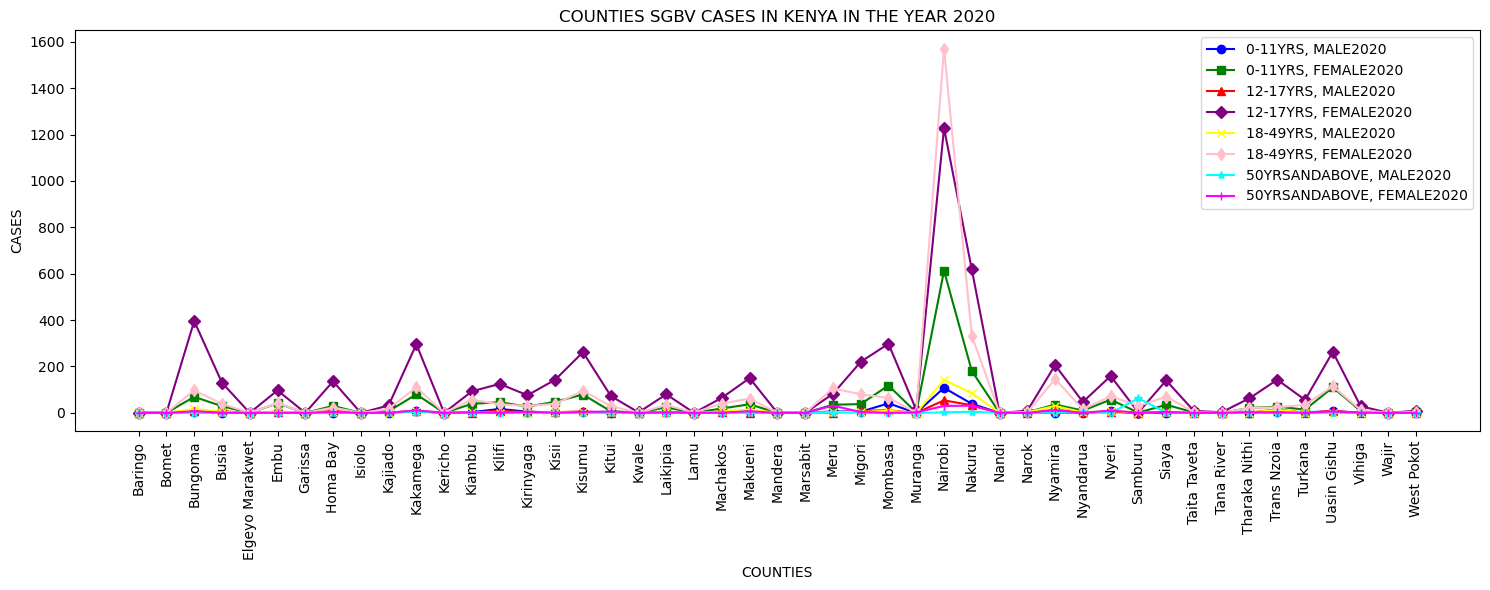

In [359]:
# List of columns to plot
columns = [
   '0-11YRS,MALE2020', '0-11YRS,FEMALE2020',
        '12-17YRS,MALE2020',
        '12-17YRS,FEMALE2020',
        '18-49YRS,MALE2020', '18-49YRS,FEMALE2020','50YRSANDABOVE,MALE2020',
        '50YRSANDABOVE,FEMALE2020',
]

# Define markers and colors
markers = ['o', 's', '^', 'D', 'x', 'd', '*', '+', 'h', 'v', '<', '>', 'p', 'H']
colors = ['b', 'g', 'r', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'orange', 'brown']

# Create a larger figure to fit all counties
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Create a plot for each column
for i, col in enumerate(columns):
    marker = markers[i % len(markers)]
    color = colors[i % len(colors)]
    label = col.replace(',', ' ').replace(' ', ', ')
    
    plt.plot(df_indexed.index, df_indexed[col], marker=marker, linestyle='-', color=color, label=label)

# Adding legend and labels
plt.legend()
plt.xlabel('COUNTIES')
plt.ylabel('CASES')
plt.title('COUNTIES SGBV CASES IN KENYA IN THE YEAR 2020')

# Set x-axis labels to vertical and adjust label alignment
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels to vertical with horizontal alignment center

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [360]:
df_head = df_sorted.head(24)

### __SGBV CASES IN KENYA IN THE YEAR 2021__

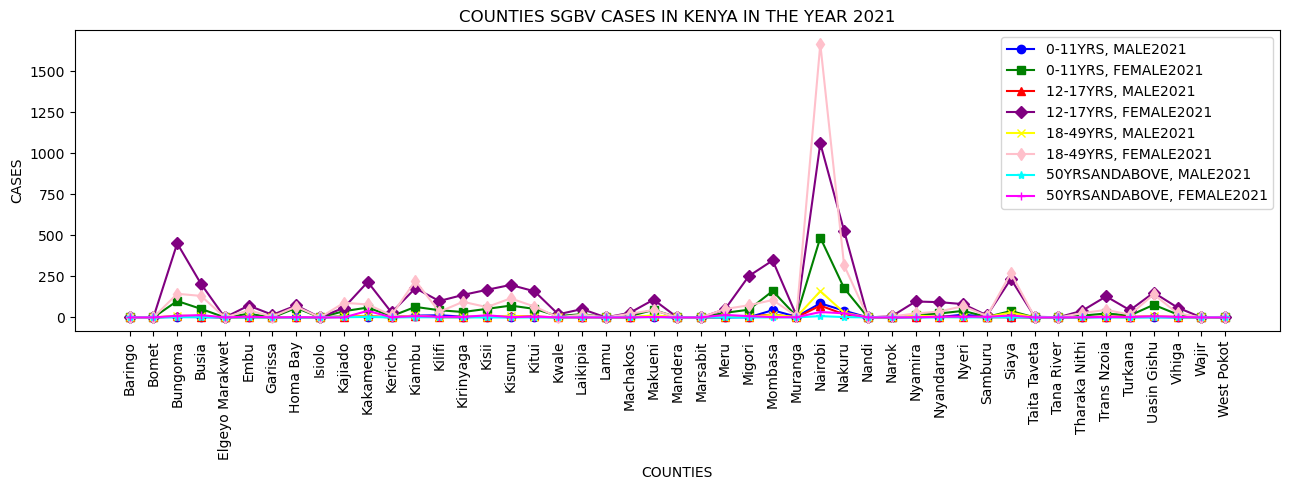

In [361]:
# List of columns to plot
columns = [
    '0-11YRS,MALE2021', '0-11YRS,FEMALE2021',
    '12-17YRS,MALE2021', '12-17YRS,FEMALE2021',
    '18-49YRS,MALE2021', '18-49YRS,FEMALE2021',
    '50YRSANDABOVE,MALE2021', '50YRSANDABOVE,FEMALE2021',
]

# Define markers and colors
markers = ['o', 's', '^', 'D', 'x', 'd', '*', '+', 'h', 'v', '<', '>', 'p', 'H']
colors = ['b', 'g', 'r', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'orange', 'brown']

# Create a larger figure to fit all counties
plt.figure(figsize=(13, 5))  # Adjust width and height as needed

# Create a plot for each column
for i, col in enumerate(columns):
    marker = markers[i % len(markers)]
    color = colors[i % len(colors)]
    label = col.replace(',', ' ').replace(' ', ', ')
    
    plt.plot(df_indexed.index, df_indexed[col], marker=marker, linestyle='-', color=color, label=label)

# Adding legend and labels
plt.legend()
plt.xlabel('COUNTIES')
plt.ylabel('CASES')
plt.title('COUNTIES SGBV CASES IN KENYA IN THE YEAR 2021')

# Set x-axis labels to vertical and adjust label alignment
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels to vertical with horizontal alignment center

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

### __SGBV CASES IN KENYA IN THE YEAR 2022__

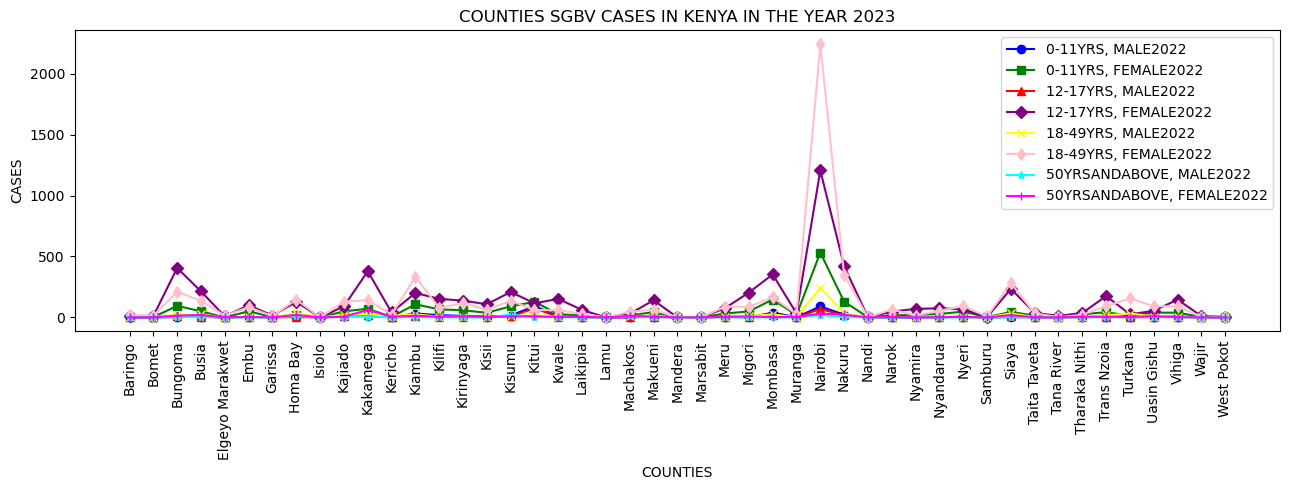

In [366]:
# List of columns to plot
columns = [
    '0-11YRS,MALE2022', '0-11YRS,FEMALE2022',
    '12-17YRS,MALE2022', '12-17YRS,FEMALE2022',
    '18-49YRS,MALE2022', '18-49YRS,FEMALE2022',
    '50YRSANDABOVE,MALE2022', '50YRSANDABOVE,FEMALE2022',
]

# Define markers and colors
markers = ['o', 's', '^', 'D', 'x', 'd', '*', '+', 'h', 'v', '<', '>', 'p', 'H']
colors = ['b', 'g', 'r', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'orange', 'brown']

# Create a larger figure to fit all counties
plt.figure(figsize=(13, 5))  # Adjust width and height as needed

# Create a plot for each column
for i, col in enumerate(columns):
    marker = markers[i % len(markers)]
    color = colors[i % len(colors)]
    label = col.replace(',', ' ').replace(' ', ', ')
    
    plt.plot(df_indexed.index, df_indexed[col], marker=marker, linestyle='-', color=color, label=label)

# Adding legend and labels
plt.legend()
plt.xlabel('COUNTIES')
plt.ylabel('CASES')
plt.title('COUNTIES SGBV CASES IN KENYA IN THE YEAR 2023')

# Set x-axis labels to vertical and adjust label alignment
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels to vertical with horizontal alignment center

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [385]:

# Set 'COUNTY' as the index
df = df.set_index('COUNTY')


df['TOTALCASESPRESENTEDIN2020'] = df[
    ['TOTALMALE&FEMALE0-11YRS2020',
     'TOTALMALE&FEMALE12-17YRS,2020',
     'TOTALMALE&FEMALE18-49YRS,2020',
     'TOTALMALE&FEMALE50YRSANDABOVE,2020']
].sum(axis=1)
# Total for 2021
df['TOTALCASESPRESENTEDIN2021'] = df[
    ['TOTALMALE&FEMALE0-11YRS,2021',
     'TOTALMALE&FEMALE12-17YRS,2021',
     'TOTALMALE&FEMALE18-49YRS,2021',
     'TOTALMALE&FEMALE50YRSANDABOVE,2021']
].sum(axis=1)

# Total for 2022
df['TOTALCASESPRESENTEDIN2022'] = df[
    ['TOTALMALE&FEMALE0-11YRS,2022',
     'TOTALMALE&FEMALE12-17YRS,MALE2022',
     'TOTALMALE&FEMALE18-49YRS,MALE2022',
     'TOTALMALE&FEMALE50YRSANDABOVE,2022']
].sum(axis=1)

# Total for 2023
df['TOTALCASESPRESENTEDIN2023'] = df[
    ['TOTALMALE&FEMALE0-11YRS,MALE2023',
     'TOTALMALE&FEMALE12-17YRS,2023',
     'TOTALMALE&FEMALE18-49YRS,2023',
     'TOTALMALE&FEMALE50YRSANDABOVE,2023']
].sum(axis=1)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1856\1094528559.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(columns_to_plot))  # 'tab10' is a color palette with 10 distinct colors


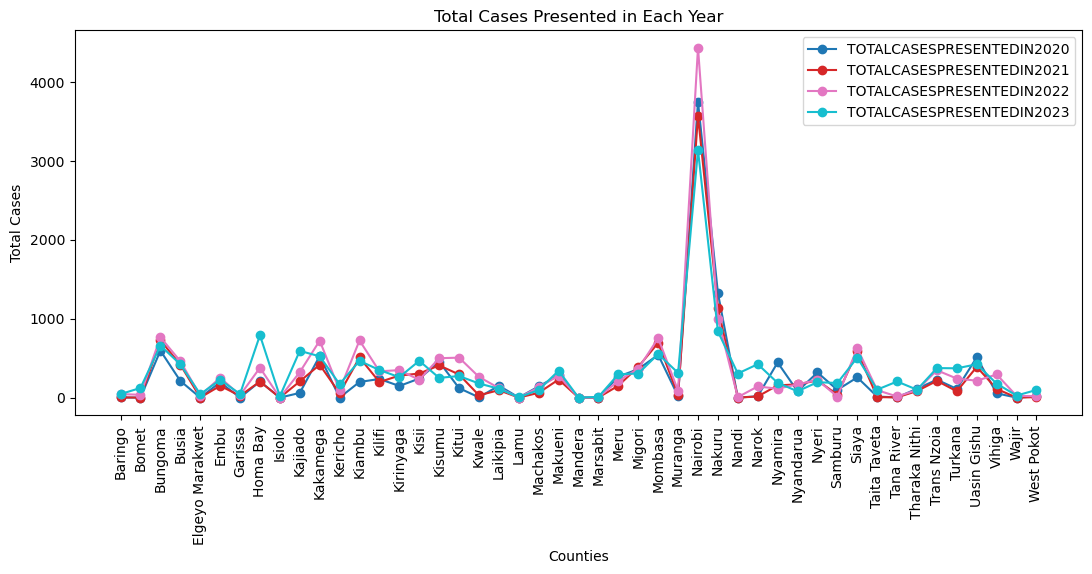

In [391]:
# List of columns to plot
columns_to_plot = ['TOTALCASESPRESENTEDIN2020', 'TOTALCASESPRESENTEDIN2021', 'TOTALCASESPRESENTEDIN2022', 'TOTALCASESPRESENTEDIN2023']

# Create a larger figure to fit all counties
plt.figure(figsize=(13, 5))  # Adjust width and height as needed

# Create a color map using a colormap from matplotlib
colors = plt.cm.get_cmap('tab10', len(columns_to_plot))  # 'tab10' is a color palette with 10 distinct colors

for i, col in enumerate(columns_to_plot):
    marker = 'o'  # Customize markers for each line
    color = colors(i)  # Get a distinct color for each column
    label = col.replace(',', ' ').replace(' ', ', ')  # Clean the label
    
    # Plot each column separately with a unique color
    plt.plot(df.index, df[col], marker=marker, linestyle='-', color=color, label=label)

# Add labels, title, and legend
plt.legend()
plt.xlabel('Counties')
plt.ylabel('Total Cases')
plt.title('Total Cases Presented in Each Year')
# Set x-axis labels to vertical and adjust label alignment
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels to vertical with horizontal alignment center

plt.show()


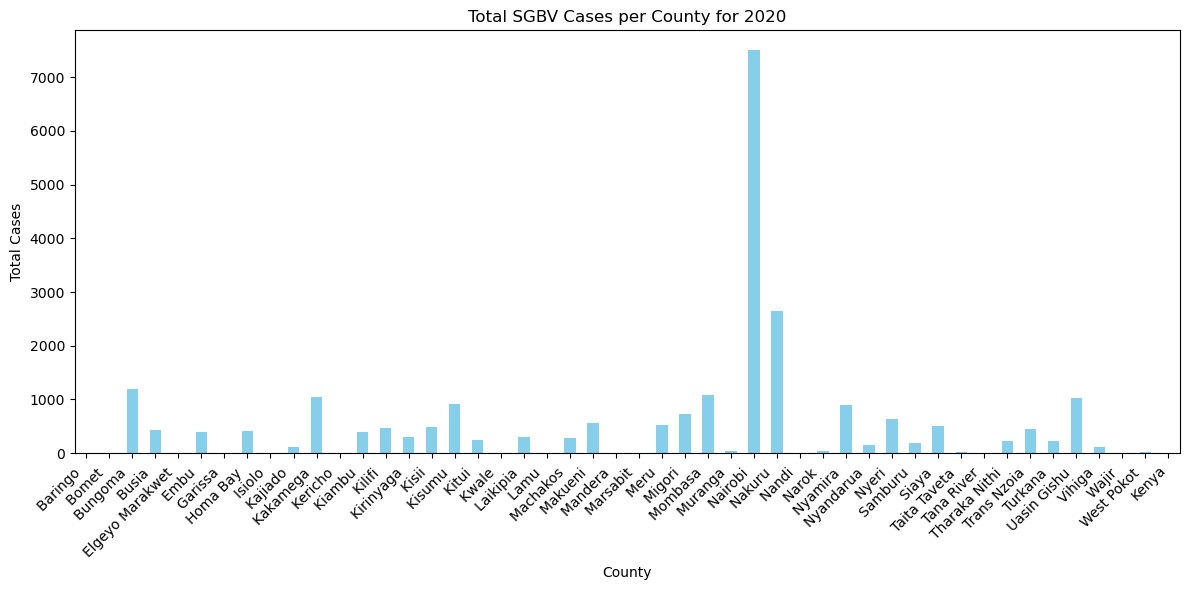

In [395]:
# Plotting the bar graph for Total Cases 2020
df_sorted['Total Cases 2020'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGBV Cases per County for 2020')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Save the plot as a PDF
plt.savefig('total_cases_per_county_2020.pdf', format='pdf')

# Display the plot
plt.show()

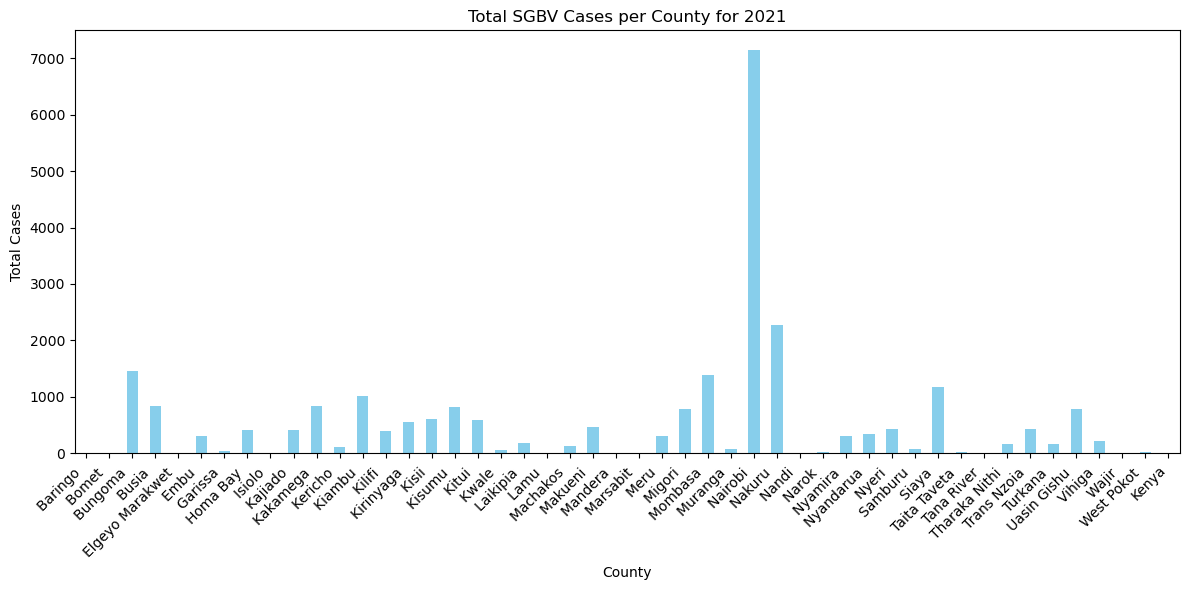

In [396]:
# Plotting the bar graph for Total Cases 2021
df_sorted['Total Cases 2021'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGBV Cases per County for 2021')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels



# Save the plot as a PDF
plt.savefig('total_cases_per_county_2021.pdf', format='pdf')

# Display the plot
plt.show()

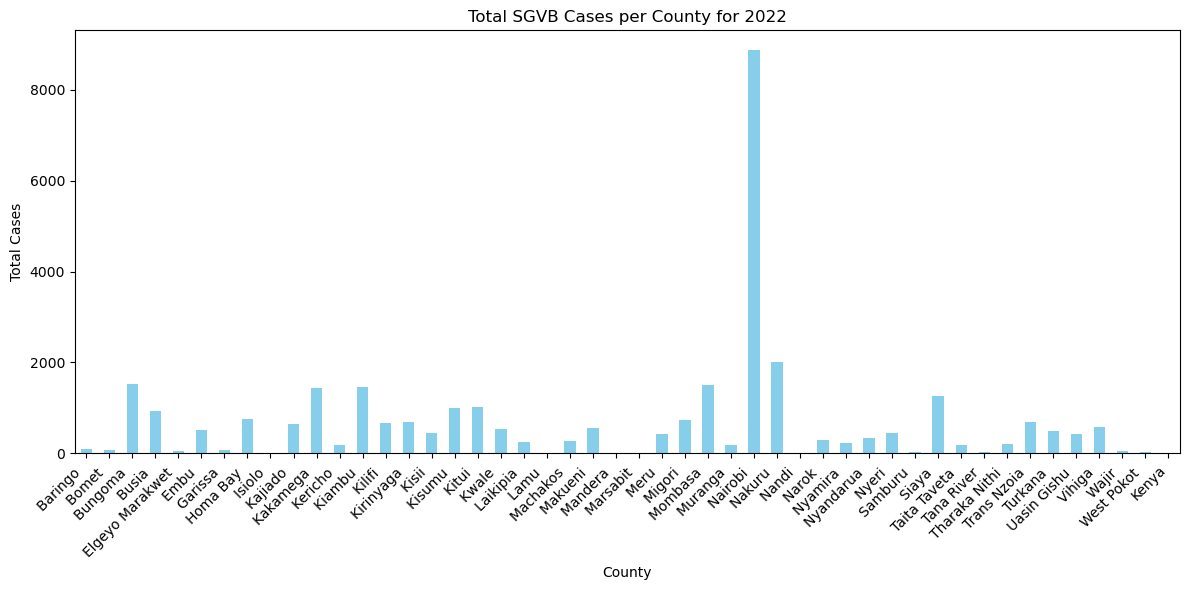

In [400]:
# Plotting the bar graph for Total Cases 2022
df_sorted['Total Cases 2022'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGVB Cases per County for 2022')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels
# Save the plot as a PDF
plt.savefig('total_cases_per_county_2022.pdf', format='pdf')

# Display the plot
plt.show()

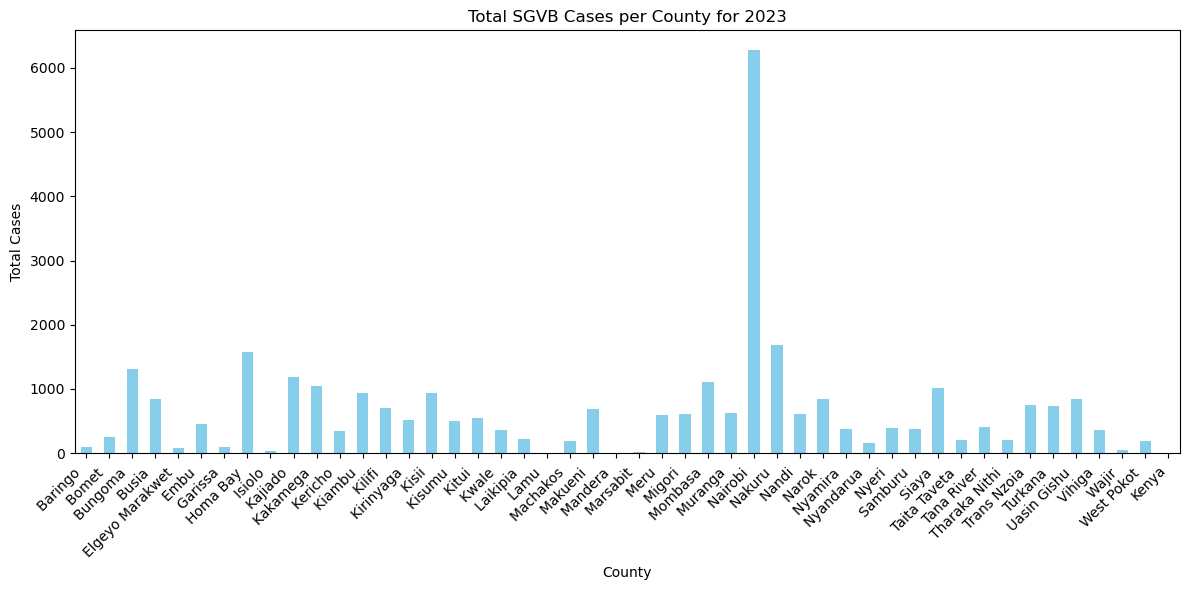

In [401]:
# Plotting the bar graph for Total Cases 2022
df_sorted['Total Cases 2023'].plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add titles and labels
plt.title('Total SGVB Cases per County for 2023')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
# Save the plot as a PDF
plt.savefig('total_cases_per_county_2023.pdf', format='pdf')
plt.show()

In [406]:
# Sort the DataFrame by 'Total Cases 2020', 'Total Cases 2021', 'Total Cases 2022', and 'Total Cases 2023' in ascending order
df_sorted = df_sorted.sort_values(by=['Total Cases 2020', 'Total Cases 2021', 'Total Cases 2022', 'Total Cases 2023'], ascending=False)

In [407]:
df_sorted

0-11YRS,MALE2020  0-11YRS,FEMALE2020  \
COUNTY                                                   
Nairobi                      108.0               613.0   
Nakuru                        39.0               181.0   
Bungoma                        2.0                69.0   
Mombasa                       41.0               118.0   
Kakamega                       8.0                80.0   
Uasin Gishu                    6.0               110.0   
Kisumu                         4.0                79.0   
Nyamira                        1.0                36.0   
Migori                         5.0                38.0   
Nyeri                          7.0                57.0   
Makueni                       10.0                37.0   
Meru                           6.0                35.0   
Siaya                          0.0                35.0   
Kisii                          2.0                48.0   
Kilifi                        17.0                46.0   
Trans Nzoia                    3.0                27.0   
Busia                          1.0                29.0   
Homa Bay                       1.0                30.0   
Kiambu                         3.0                39.0   
Embu                           2.0                41.0   
Laikipia                       4.0                24.0   
Kirinyaga                      5.0                27.0   
Machakos                       5.0                19.0   
Kitui                          1.0                 7.0   
Tharaka Nithi                  1.0                21.0   
Turkana                        3.0                14.0   
Samburu                        0.0                 1.0   
Nyandarua                      1.0                10.0   
Kajiado                        1.0                 7.0   
Vihiga                         2.0                 9.0   
Muranga                        0.0                 2.0   
Narok                          0.0                 3.0   
West Pokot                     0.0                 2.0   
Taita Taveta                   0.0                 2.0   
Kwale                          0.0                 1.0   
Tana River                     0.0                 0.0   
Baringo                        0.0                 0.0   
Lamu                           0.0                 0.0   
Kericho                        0.0                 0.0   
Garissa                        0.0                 0.0   
Marsabit                       0.0                 0.0   
Bomet                          0.0                 0.0   
Elgeyo Marakwet                0.0                 0.0   
Wajir                          0.0                 0.0   
Nandi                          0.0                 0.0   
Isiolo                         0.0                 0.0   
Mandera                        0.0                 0.0   
Kenya                          0.0                 0.0   

                  TOTALMALE&FEMALE0-11YRS2020  12-17YRS,MALE2020  \
COUNTY                                                             
Nairobi                                   721               54.0   
Nakuru                                    220               33.0   
Bungoma                                    71                7.0   
Mombasa                                   159               11.0   
Kakamega                                   88                7.0   
Uasin Gishu                               116                9.0   
Kisumu                                     83                6.0   
Nyamira                                    37               13.0   
Migori                                     43                9.0   
Nyeri                                      64                4.0   
Makueni                                    47                1.0   
Meru                                       41                1.0   
Siaya                                      35                2.0   
Kisii                                      50                3.0   
Kilifi                       

In [408]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(48, 5))  # Adjust the size as needed
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.yaxis.set_visible(False)  # Hide the y-axis
ax.set_frame_on(False)  # Hide the frame

# Add the table to the axis
tabla = table(ax, df_sorted, loc='center', cellLoc='center', colWidths=[0.2]*len(df_sorted.columns))

# Style the table
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)  # Adjust the scaling as needed

# Save the figure as a PDF
plt.savefig('dataframe_as_pdf.pdf', format='pdf', bbox_inches='tight')

# Optionally show the plot (not necessary for saving)
plt.show()

In [409]:
# Get the last 20 rows from df_sorted
df_tail = df_sorted.tail(20)

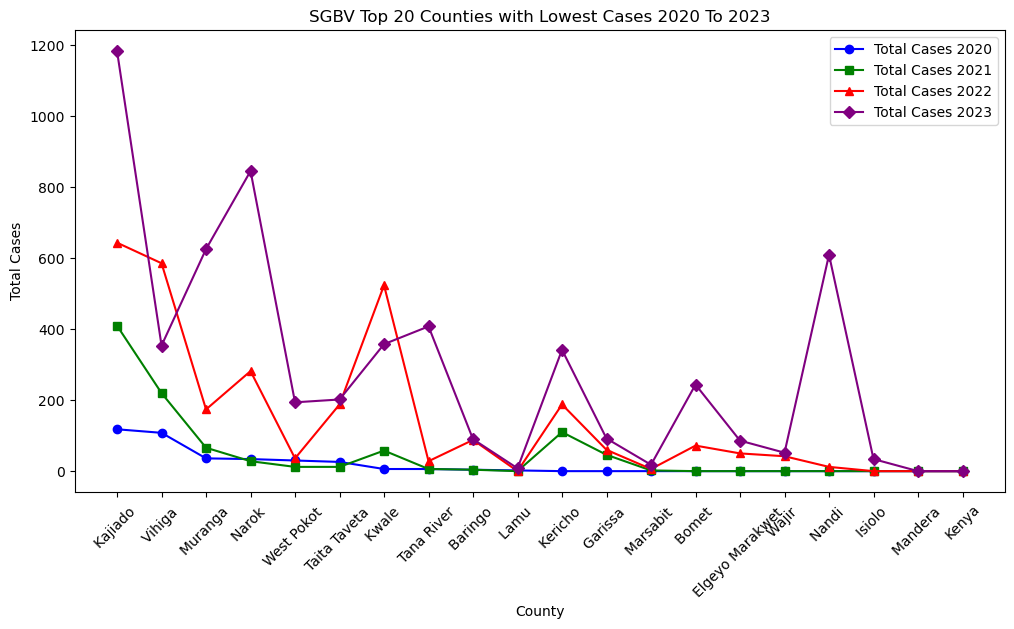

In [410]:
# Plotting the line graphs for multiple columns
plt.figure(figsize=(12, 6))

# Plot each column with a different color
plt.plot(df_tail.index, df_tail['Total Cases 2020'], marker='o', linestyle='-', color='b', label='Total Cases 2020')
plt.plot(df_tail.index, df_tail['Total Cases 2021'], marker='s', linestyle='-', color='g', label='Total Cases 2021')
plt.plot(df_tail.index, df_tail['Total Cases 2022'], marker='^', linestyle='-', color='r', label='Total Cases 2022')
plt.plot(df_tail.index, df_tail['Total Cases 2023'], marker='D', linestyle='-', color='purple', label='Total Cases 2023')

# Add titles and labels
plt.title('SGBV Top 20 Counties with Lowest Cases 2020 To 2023')
plt.xlabel('County')
plt.ylabel('Total Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.tight_layout


plt.savefig('SGBV Top 20 Counties with Lowest Cases 2020 To 2023.pdf', format='pdf')
plt.show()

In [411]:
# Get the last 20 rows from df_sorted
df_head = df_sorted.head(27)

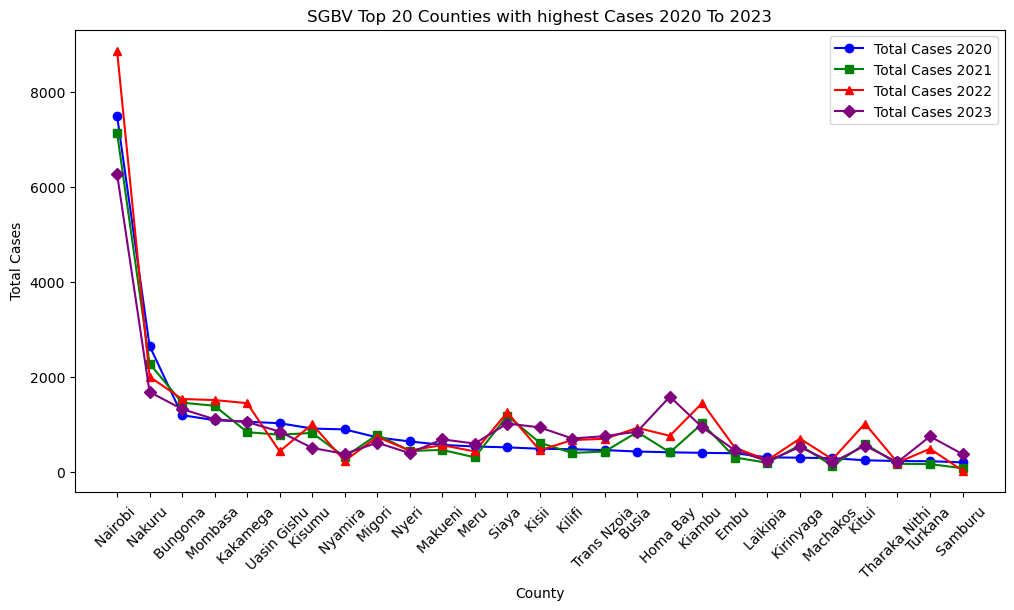

In [412]:
# Plotting the line graphs for multiple columns
plt.figure(figsize=(12, 6))

# Plot each column with a different color
plt.plot(df_head.index, df_head['Total Cases 2020'], marker='o', linestyle='-', color='b', label='Total Cases 2020')
plt.plot(df_head.index, df_head['Total Cases 2021'], marker='s', linestyle='-', color='g', label='Total Cases 2021')
plt.plot(df_head.index, df_head['Total Cases 2022'], marker='^', linestyle='-', color='r', label='Total Cases 2022')
plt.plot(df_head.index, df_head['Total Cases 2023'], marker='D', linestyle='-', color='purple', label='Total Cases 2023')

# Add titles and labels
plt.title('SGBV Top 20 Counties with highest Cases 2020 To 2023')
plt.xlabel('County')
plt.ylabel('Total Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.tight_layout


plt.savefig('SGBV Top 20 Counties with highest Cases 2020 To 2023.pdf', format='pdf')
plt.show()

### __Using plotly express to create a horizontal bar chart for variance__. 

In [413]:
# Calculate variance
var = df_sorted.var()


In [414]:
print("var:", type(var))
print("var:", var.shape)
var


var: <class 'pandas.core.series.Series'>
var: (56,)


0-11YRS,MALE2020                      2.948293e+02
0-11YRS,FEMALE2020                    8.499787e+03
TOTALMALE&FEMALE0-11YRS2020           1.182808e+04
12-17YRS,MALE2020                     8.721809e+01
12-17YRS,FEMALE2020                   4.214198e+04
TOTALMALE&FEMALE12-17YRS,2020         4.586166e+04
18-49YRS,MALE2020                     5.661259e+02
18-49YRS,FEMALE2020                   5.208761e+04
TOTALMALE&FEMALE18-49YRS,2020         6.274956e+04
50YRSANDABOVE,MALE2020                8.259397e+01
50YRSANDABOVE,FEMALE2020              5.785062e+01
TOTALMALE&FEMALE50YRSANDABOVE,2020    1.427336e+02
TOTALCASESPRESENTEDIN2020             0.000000e+00
0-11YRS,MALE2021                      2.176383e+02
0-11YRS,FEMALE2021                    5.829670e+03
TOTALMALE&FEMALE0-11YRS,2021          8.155489e+03
12-17YRS,MALE2021                     1.166365e+02
12-17YRS,FEMALE2021                   3.331219e+04
TOTALMALE&FEMALE12-17YRS,2021         3.703110e+04
18-49YRS,MALE2021              

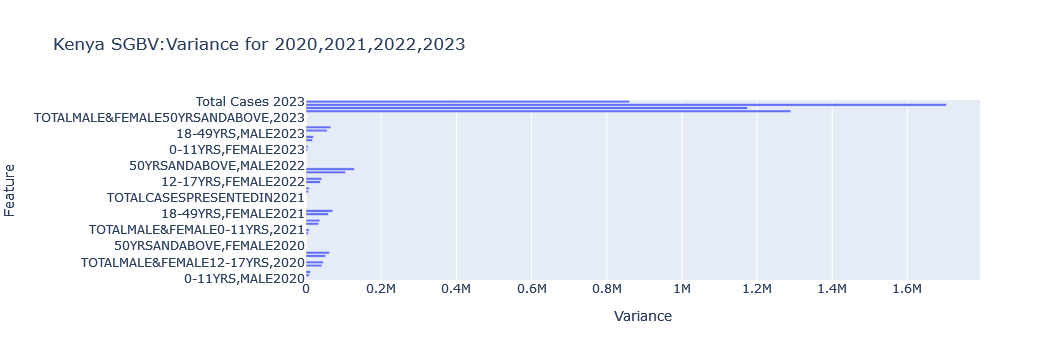

In [415]:
# Create horizontal bar chart for var
fig = px.bar(
    x=var,
    y=var.index,
    title = "Kenya SGBV:Variance for 2020,2021,2022,2023 "
    
)
fig.update_layout(xaxis_title= "Variance", yaxis_title= "Feature")

fig.show()


In [416]:
# Calculate trimmed variance
trim_var = df_sorted.apply(trimmed_var, limits=(0.1, 0.1)).sort_values()


In [417]:
trim_var

TOTALCASESPRESENTEDIN2022                  0.000000
TOTALCASESPRESENTEDIN2021                  0.000000
TOTALCASESPRESENTEDIN2023                  0.000000
TOTALCASESPRESENTEDIN2020                  0.000000
50YRSANDABOVE,MALE2021                     0.249375
50YRSANDABOVE,MALE2020                     0.249375
50YRSANDABOVE,MALE2023                     2.797500
50YRSANDABOVE,MALE2022                     3.549375
12-17YRS,MALE2021                          6.390000
0-11YRS,MALE2020                           6.640000
0-11YRS,MALE2021                           8.010000
50YRSANDABOVE,FEMALE2020                   8.094375
12-17YRS,MALE2020                         11.019375
18-49YRS,MALE2020                         13.524375
TOTALMALE&FEMALE50YRSANDABOVE,2020        13.694375
12-17YRS,MALE2022                         14.274375
50YRSANDABOVE,FEMALE2021                  14.940000
0-11YRS,MALE2023                          15.484375
18-49YRS,MALE2021                         15.510000
TOTALMALE&FE

### __Using  plotly express to create a horizontal bar chart of trim_var__. 

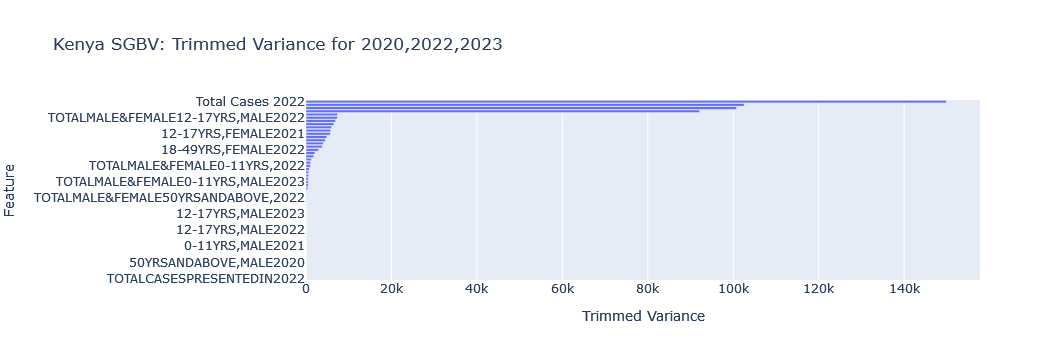

<Figure size 640x480 with 0 Axes>

In [418]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
    x=trim_var,
    y=trim_var.index,
    title = "Kenya SGBV: Trimmed Variance for 2020,2022,2023"
)
fig.update_layout(xaxis_title= "Trimmed Variance", yaxis_title= "Feature")

plt.savefig('Kenya SGBV:Trimmed Variance for 2020,2022,2023.pdf', format='pdf')
fig.show()


### __Generate a list high_var_cols with the column__ 


In [419]:
high_var_cols = trim_var.tail(5).index.to_list()

In [420]:
print("high_var_cols type:", type(high_var_cols))

high_var_cols type: <class 'list'>


In [421]:
print("high_var_cols len:", len(trim_var))



high_var_cols len: 56


In [422]:
high_var_cols


['TOTALMALE&FEMALE12-17YRS,2020',
 'Total Cases 2020',
 'Total Cases 2023',
 'Total Cases 2021',
 'Total Cases 2022']

### __Creating the feature matrix X__. 

In [286]:
X = df[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

KeyError: "None of [Index(['Total Cases 2020', 'Total Cases 2023', 'Total Cases 2021',\n       'Total Cases 2022'],\n      dtype='object')] are in the [columns]"

### __Build Model__


### __Iterate__


### __Creating a DataFrame X_summary with the mean and standard deviation for all the features in X__.

In [273]:
X_summary = X.aggregate(["mean","std"]).astype(int)

print("X_summary type:", type(X_summary))
print("X_summary shape:", X_summary.shape)
X_summary


X_summary type: <class 'pandas.core.frame.DataFrame'>
X_summary shape: (2, 4)


Total Cases 2020  Total Cases 2023  Total Cases 2021  Total Cases 2022
mean               511               652               526               668
std               1135               927              1083              1305

### __Create a StandardScaler transformer, use it to transform the data in X, and then put the transformed data into a DataFrame named X_scaled__.


In [274]:
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns)


In [275]:
print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()


X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (48, 4)


Total Cases 2020  Total Cases 2023  Total Cases 2021  Total Cases 2022
0         -0.451889         -0.612572         -0.487420         -0.449177
1         -0.455448         -0.444789         -0.491150         -0.461566
2          0.603372          0.725335          0.862610          0.667330
3         -0.078188          0.208912          0.288288          0.196570
4         -0.455448         -0.616930         -0.491150         -0.478600

### __Creating a DataFrame X_scaled_summary with the mean and standard deviation for all the features in X_scaled__.


In [276]:
X_scaled_summary = X_scaled.aggregate(["mean","std"]).astype(int)

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary


X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 4)


Total Cases 2020  Total Cases 2023  Total Cases 2021  Total Cases 2022
mean                 0                 0                 0                 0
std                  1                 1                 1                 1

In [277]:
n_clusters = (2, 6)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build our model
    model = make_pipeline(StandardScaler(), KMeans(n_clusters = k,random_state = 42,n_init=10))
    # Train our model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # calculate silhouette_scores
    silhouette_scores.append(
        silhouette_score(X,model.named_steps["kmeans"].labels_)
    )
    

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)




C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



inertia_errors type: <class 'list'>
inertia_errors len: 2
Inertia: [34.26115918191837, 4.981275450384558]

silhouette_scores type: <class 'list'>
silhouette_scores len: 2
Silhouette Scores: [0.9030222238293885, 0.4446748481389225]


### __Using plotly express to create a line plot that shows the values of inertia_errors as a function of n_clusters__.

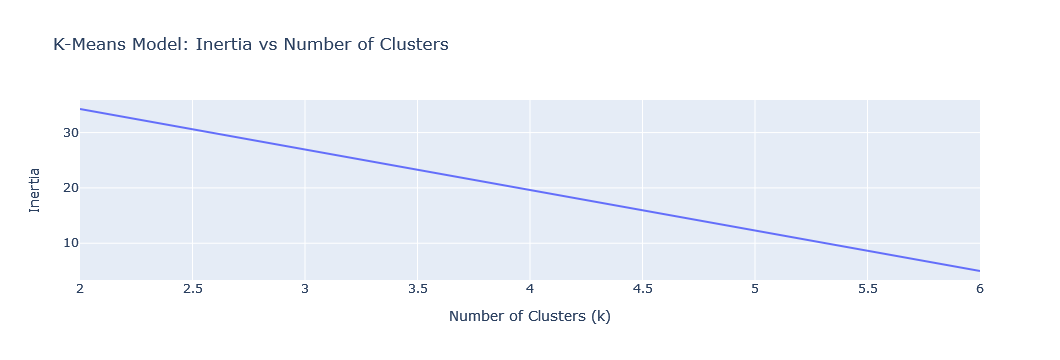

In [278]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters, y=inertia_errors, title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters (k)",yaxis_title = "Inertia")

fig.show()


### __Using plotly express to create a line plot that shows the values of silhouette_scores as a function of n_clusters__.

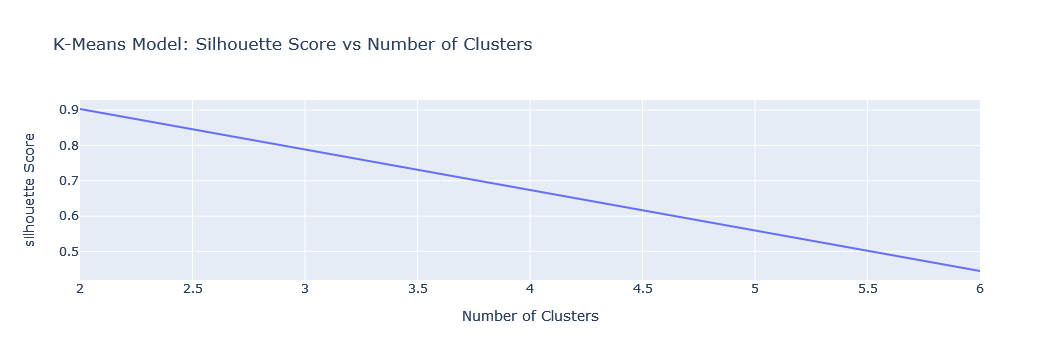

In [279]:

# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title ="K-Means Model: Silhouette Score vs Number of Clusters"
    

)
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="silhouette Score")

fig.show()


### __Build and train a new k-means model named final_model__

In [280]:
# Build model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=1, random_state=42)
)


# Fit model to data
final_model.fit(X)



C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\ADMIN\Anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=1, random_state=42))])

### Extracting the labels for final_model created during training and assign them to the variable labels.


In [281]:
labels = final_model.named_steps["kmeans"].labels_

print("labels type:", type(labels))
print("labels len:", len(labels))
print(labels[:5])

labels type: <class 'numpy.ndarray'>
labels len: 48
[0 0 0 0 0]


### Create a DataFrame xgb

In [282]:
xgb = X.groupby(labels).mean()

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb


xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (1, 4)


Total Cases 2020  Total Cases 2023  Total Cases 2021  Total Cases 2022
0           511.875            652.25        526.791667           668.125

#### Use plotly express to create a side-by-side bar chart from xgb that shows the mean of the features in X for each of the clusters in your final_model. 

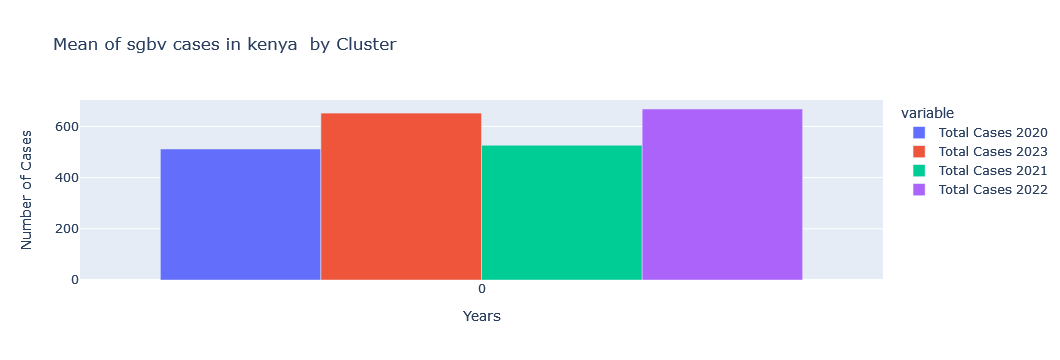

In [283]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode = "group",
    title= "Mean of sgbv cases in kenya  by Cluster"

)
fig.update_layout(xaxis_title="Years", yaxis_title = "Number of Cases")
fig.show()




### __Creating a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca__.

In [284]:
# Instantiate transformer
pca = PCA(n_components=2,random_state =42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1", "PC2"])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (48, 2)


PC1         PC2
0 -1079.289150  -94.113873
1 -1029.889085    8.501792
2  1568.106484   50.579001
3   332.798321  198.228521
4 -1107.121367 -103.287577

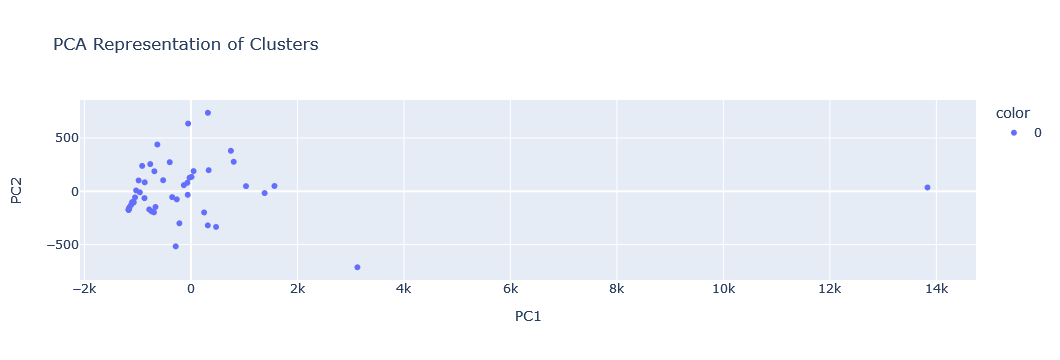

In [285]:
fig =px.scatter(
    data_frame = X_pca,
    x="PC1",
    y="PC2",
    color = labels.astype(str),
    title="PCA Representation of Clusters"
)

fig.update_layout(xaxis_title="PC1", yaxis_title = "PC2")

fig.show()